In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Question 1

In [337]:
data = np.array([['Dec 2019', '20191120', 56.23], ['Jan 2020', '20191219', 56.27], ['Feb 2020', '20200121', 56.10], ['Mar 2020', '20200220', 55.86],
                 ['Apr 2020', '20200320', 55.44], ['May 2020', '20200421', 55.08], ['Jun 2020', '20200519', 54.70], ['Jul 2020', '20200622', 54.29], 
                 ['Aug 2020', '20200721', 54.01], ['Sep 2020', '20200820', 53.62], ['Oct 2020', '20200922', 53.08], ['Nov 2020', '20201020', 53.42], 
                 ['Dec 2020', '20201120', 53.02],  ['Jan 2021', '20211221', 52.17], ['Jun 2021', '20210520', 52.18], ['Dec 2021', '20211119', 51.75], 
                 ['Dec 2022', '20221121', 51.64], ['Dec 2023', '20231120', 51.83], ['Jun 2024', '20240521', 51.45]])
data = pd.DataFrame(data,columns=['Contract', 'SettlementDate', 'Futures'])
data.set_index("SettlementDate", inplace=True)
data.index = pd.to_datetime(data.index, format='%Y%m%d')
data

,Contract,Futures
SettlementDate,,
2019-11-20,Dec 2019,56.23
2019-12-19,Jan 2020,56.27
2020-01-21,Feb 2020,56.1
2020-02-20,Mar 2020,55.86
2020-03-20,Apr 2020,55.44
2020-04-21,May 2020,55.08
2020-05-19,Jun 2020,54.7
2020-06-22,Jul 2020,54.29
2020-07-21,Aug 2020,54.01


In [338]:
# import the feds200628.csv data
zero_cou = pd.read_csv('zerocoupon.csv')
zero_cou.set_index("Date", inplace=True)
zero_cou.index = pd.to_datetime(zero_cou.index)

In [339]:
# zero-coupon bond function
firstday = pd.Timestamp('2019-10-25')
calcu = zero_cou[firstday:firstday]
beta0 = calcu.BETA0.values
beta1 = calcu.BETA1.values
beta2 = calcu.BETA2.values
beta3 = calcu.BETA3.values
tau1 = calcu.TAU1.values
tau2 = calcu.TAU2.values
def Bond(n):
    return beta0 + beta1 * (1 - np.exp(-n/tau1)) / (n/tau1) + beta2 * ((1 - np.exp(-n/tau1)) / (n/tau1) - np.exp(-n/tau1)) \
            + beta3 * ((1 - np.exp(-n/tau2)) / (n/tau2) - np.exp(-n/tau2))

In [340]:
import pandas_market_calendars as mcal
# Create a calendar to calculate T for each contract
nyse = mcal.get_calendar('NYSE')
T = []
for a in range(0, len(data)):
    t  = (nyse.valid_days(start_date=firstday, end_date=data.index[a])[-1] - nyse.valid_days(start_date=firstday, end_date=data.index[a])[0]).days
    T.append(t)
data['T'] = T
data['T'] = data['T'] / 252
data['Bt'] = Bond(data['T'])
data

,Contract,Futures,T,Bt
SettlementDate,,,,
2019-11-20,Dec 2019,56.23,0.103175,1.711965
2019-12-19,Jan 2020,56.27,0.218254,1.706028
2020-01-21,Feb 2020,56.1,0.349206,1.699603
2020-02-20,Mar 2020,55.86,0.468254,1.694063
2020-03-20,Apr 2020,55.44,0.583333,1.688974
2020-04-21,May 2020,55.08,0.710317,1.683657
2020-05-19,Jun 2020,54.7,0.821429,1.679256
2020-06-22,Jul 2020,54.29,0.956349,1.674221
2020-07-21,Aug 2020,54.01,1.071429,1.670189


In [341]:
# calculate the ratio
data[['Futures']] = data[['Futures']].astype(float)
data['FB'] = data['Futures']*data['Bt']
data['ratio_FB']  = np.insert(data['FB'][:-1].values/data['FB'][1:].values,0,values=0,axis = 0)
data

,Contract,Futures,T,Bt,FB,ratio_FB
SettlementDate,,,,,,
2019-11-20,Dec 2019,56.23,0.103175,1.711965,96.263801,0.000000
2019-12-19,Jan 2020,56.27,0.218254,1.706028,95.998176,1.002767
2020-01-21,Feb 2020,56.10,0.349206,1.699603,95.347729,1.006822
2020-02-20,Mar 2020,55.86,0.468254,1.694063,94.630353,1.007581
2020-03-20,Apr 2020,55.44,0.583333,1.688974,93.636719,1.010612
2020-04-21,May 2020,55.08,0.710317,1.683657,92.735816,1.009715
2020-05-19,Jun 2020,54.70,0.821429,1.679256,91.855293,1.009586
2020-06-22,Jul 2020,54.29,0.956349,1.674221,90.893451,1.010582
2020-07-21,Aug 2020,54.01,1.071429,1.670189,90.206903,1.007611


# Question 2

In [342]:
def print_fun(x, f, accepted):
    if accepted == 1:
        error.append((data[1:].apply(lambda y: Yield(y['T'],x[0],x[1],x[2],x[3]),axis = 1) - data.ratio_FB[1:]).abs().sum()/(data.shape[0]))
    print("at minimum %.4f %.4f %.4f %.4f accepted %d" % (x[0],x[1],x[2],x[3], int(accepted)))

In [343]:
from scipy.optimize import minimize
from scipy.optimize import basinhopping
def Yield(T, k, theta, eta, y0):
    b_vk = (1 - np.exp(-k * T)) / k
    a_vk = np.exp((b_vk - T) * (k**2 * theta - eta**2 / 2.0) / k**2 - eta**2 * b_vk**2 / (4.0 * k))
    return a_vk * np.exp(-b_vk * y0)
fun = lambda x: (data[1:].apply(lambda y: Yield(y['T'],x[0],x[1],x[2],x[3]),axis = 1) - data.ratio_FB[1:]).abs().sum()
initial_guess = (1,1,1,1)    
error = []
#res = minimize(fun, initial_guess,options={'disp': True})
res = basinhopping(fun,initial_guess, callback = print_fun)
res.x

at minimum 1.8241 0.0594 0.6164 -0.0466 accepted 1
at minimum 1.6140 0.0238 0.3309 -0.0309 accepted 1
at minimum 2.1810 0.0525 0.6905 -0.0486 accepted 1
at minimum 2.1371 0.0163 0.3541 -0.0332 accepted 1
at minimum 2.1488 0.0141 0.3186 -0.0333 accepted 1


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
//anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


at minimum 0.6907 0.3434 0.6274 0.0284 accepted 1
at minimum 1.2973 0.0400 -0.3547 -0.0329 accepted 1
at minimum 0.1567 1.0696 0.0259 -0.4143 accepted 0


//anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


at minimum 0.5334 0.7823 -0.0913 -0.3530 accepted 0
at minimum 1.1443 0.0346 -0.2891 -0.0292 accepted 1
at minimum 1.0897 0.0370 -0.2832 -0.0293 accepted 1


//anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


at minimum 0.7973 0.0501 0.2483 -0.0283 accepted 1
at minimum 1.0783 0.2335 -0.7471 -0.0913 accepted 1
at minimum 0.8389 0.0402 -0.2307 -0.0264 accepted 1
at minimum 0.8483 0.0290 0.1929 -0.0233 accepted 1
at minimum 1.3888 0.0871 -0.5744 -0.0495 accepted 1
at minimum 1.9750 0.0034 -0.0109 -0.0272 accepted 1
at minimum 1.5154 0.0386 -0.4063 -0.0357 accepted 1
at minimum 1.5046 0.0051 -0.0541 -0.0240 accepted 1


//anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


at minimum 0.0208 0.4965 0.0514 -0.0157 accepted 1
at minimum 0.6088 0.0489 0.1877 -0.0248 accepted 1
at minimum 1.2182 0.0092 -0.1119 -0.0230 accepted 1
at minimum 0.4307 0.0290 0.0885 -0.0182 accepted 1
at minimum 0.6978 0.4260 0.6729 -0.1335 accepted 1
at minimum 1.5153 0.0275 0.3369 -0.0316 accepted 1
at minimum 0.8523 0.0105 -0.0763 -0.0197 accepted 1
at minimum 0.6902 0.5063 0.7286 -0.1438 accepted 0


//anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


at minimum 0.8283 0.2575 -0.6139 -0.0835 accepted 1
at minimum 0.6392 0.0312 -0.1464 -0.0217 accepted 1
at minimum 0.2682 0.0483 -0.0800 -0.0178 accepted 1
at minimum 0.8296 0.0182 -0.1323 -0.0211 accepted 1
at minimum 0.1769 0.0899 0.0876 -0.0185 accepted 1
at minimum 0.3522 0.0500 -0.1120 -0.0197 accepted 1
at minimum 1.1431 0.0557 0.2870 -0.1331 accepted 0


//anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
//anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


at minimum 0.4327 0.8917 -0.1783 -0.4182 accepted 0
at minimum 0.3529 0.1151 0.1828 -0.0319 accepted 1
at minimum 0.2074 0.0247 -0.0087 -0.0140 accepted 1
at minimum 0.8741 0.0599 -0.2990 -0.0328 accepted 1


//anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


at minimum 0.5005 0.0179 -0.0679 -0.0176 accepted 1
at minimum 1.0137 0.2378 0.1574 -0.1531 accepted 0
at minimum 0.5579 0.0179 -0.0760 -0.0183 accepted 1
at minimum 0.7510 0.0126 0.0807 -0.0192 accepted 1
at minimum 0.4486 0.0596 0.1575 -0.0231 accepted 1
at minimum 0.8213 0.0102 0.0678 -0.0195 accepted 1


//anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


at minimum 0.7967 0.4798 -0.6077 -0.4878 accepted 0
at minimum 0.6342 0.0564 0.2114 -0.0272 accepted 1
at minimum 1.6669 0.0653 0.5905 -0.0480 accepted 1


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
//anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


at minimum 0.3363 0.7611 0.0500 -0.4576 accepted 0
at minimum 1.4457 0.0604 -0.4920 -0.0418 accepted 1


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
//anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


at minimum 0.8337 0.0252 -0.1677 -0.0230 accepted 1


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


at minimum -0.0666 -0.1319 0.0397 -0.0136 accepted 1
at minimum 0.7840 0.0562 -0.2596 -0.0298 accepted 1
at minimum 1.2379 0.0814 0.4945 -0.0466 accepted 1
at minimum 1.6556 0.0568 0.5446 -0.0437 accepted 1
at minimum 0.9774 0.0381 0.2578 -0.0286 accepted 1
at minimum 1.4171 0.0678 0.5146 -0.0425 accepted 1


//anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


at minimum 1.1888 0.7277 0.1072 -0.7278 accepted 0
at minimum 0.9949 0.5089 -1.0279 -0.1761 accepted 1
at minimum 1.7486 0.0040 0.0012 -0.0255 accepted 1
at minimum 2.0652 0.0046 -0.0912 -0.0289 accepted 1


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


at minimum 0.2651 0.4585 -0.1490 -0.2854 accepted 0
at minimum 1.8761 0.0042 0.0577 -0.0267 accepted 1
at minimum 1.7536 0.0301 0.4062 -0.0358 accepted 1
at minimum 2.2083 0.0027 0.0186 -0.0285 accepted 1
at minimum 2.7837 0.0091 -0.3141 -0.0363 accepted 1


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


at minimum 0.2428 0.4381 0.1863 -0.2328 accepted 0
at minimum 1.4185 0.0072 0.1094 -0.0238 accepted 1


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in double_scalars
  
//anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in double_scalars
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
//anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


at minimum 1.1671 0.6328 0.0128 -0.5901 accepted 0


//anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


at minimum 0.6025 0.6152 -0.0426 -0.3602 accepted 0
at minimum 1.1242 0.0290 -0.2540 -0.0274 accepted 1
at minimum 1.3352 0.0670 -0.4819 -0.0420 accepted 1
at minimum 2.3171 0.0076 0.2297 -0.0313 accepted 1
at minimum 1.8706 0.0043 -0.0630 -0.0268 accepted 1
at minimum 1.8605 0.0103 -0.2171 -0.0290 accepted 1
at minimum 1.6143 0.0939 -0.6929 -0.0564 accepted 0
at minimum 1.6262 0.0123 0.2087 -0.0276 accepted 1
at minimum 1.5759 0.0688 0.5740 -0.0482 accepted 1
at minimum 0.6068 0.0090 -0.0031 -0.0171 accepted 1
at minimum 0.5898 0.0092 0.0156 -0.0170 accepted 1
at minimum 0.9672 0.0206 -0.1735 -0.0233 accepted 1
at minimum 0.6302 0.0098 -0.0242 -0.0176 accepted 1
at minimum 0.6556 0.8261 -0.1028 -0.4506 accepted 0


//anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


at minimum 0.6132 0.6453 0.6962 -0.3037 accepted 0
at minimum 0.5882 0.0145 0.0630 -0.0180 accepted 1
at minimum 1.9724 0.0140 0.2963 -0.0307 accepted 1


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
//anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


at minimum 0.6997 0.4579 -0.6395 -0.3208 accepted 0
at minimum 1.7100 0.0239 -0.3494 -0.0321 accepted 1


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


at minimum 0.2932 0.5053 0.0716 -0.0510 accepted 0
at minimum 2.0870 0.0403 -0.5739 -0.0428 accepted 1
at minimum 1.0915 0.0280 -0.2381 -0.0269 accepted 1
at minimum 0.5038 0.0083 0.0023 -0.0159 accepted 1
at minimum 0.5239 0.0567 -0.1770 -0.0247 accepted 1
at minimum 0.6084 0.0301 0.1411 -0.0206 accepted 1
at minimum 0.2657 0.0715 -0.1083 -0.0202 accepted 1
at minimum 0.2314 0.0603 -0.0871 -0.0166 accepted 1
at minimum 0.8353 0.0101 0.0685 -0.0196 accepted 1
at minimum 1.0894 0.0438 0.3134 -0.0313 accepted 1
at minimum 1.6882 0.1071 0.7746 -0.0642 accepted 1


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
//anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


at minimum 1.0408 0.7907 0.1183 -0.7127 accepted 0
at minimum 1.0689 0.0387 0.2875 -0.0293 accepted 1


array([ 0.52394789,  0.05672364, -0.17697576, -0.02465313])

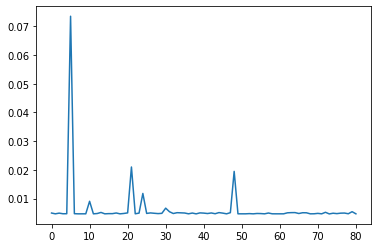

In [344]:
plt.plot(error)

In [345]:
[k, theta, eta, y0] = [0.8113, 0.0491, -0.2497, -0.0282]
data['Y'] = Yield(data['T'], k, theta, eta, y0)
data['ratio_Y']  = np.insert(data['Y'][:-1].values/data['Y'][1:].values,0,values=0,axis = 0)
data

,Contract,Futures,T,Bt,FB,ratio_FB,Y,ratio_Y
SettlementDate,,,,,,,,
2019-11-20,Dec 2019,56.23,0.103175,1.711965,96.263801,0.000000,1.001457,0.000000
2019-12-19,Jan 2020,56.27,0.218254,1.706028,95.998176,1.002767,1.002980,0.998481
2020-01-21,Feb 2020,56.10,0.349206,1.699603,95.347729,1.006822,1.004583,0.998404
2020-02-20,Mar 2020,55.86,0.468254,1.694063,94.630353,1.007581,1.005920,0.998671
2020-03-20,Apr 2020,55.44,0.583333,1.688974,93.636719,1.010612,1.007104,0.998824
2020-04-21,May 2020,55.08,0.710317,1.683657,92.735816,1.009715,1.008288,0.998826
2020-05-19,Jun 2020,54.70,0.821429,1.679256,91.855293,1.009586,1.009219,0.999078
2020-06-22,Jul 2020,54.29,0.956349,1.674221,90.893451,1.010582,1.010218,0.999011
2020-07-21,Aug 2020,54.01,1.071429,1.670189,90.206903,1.007611,1.010958,0.999268


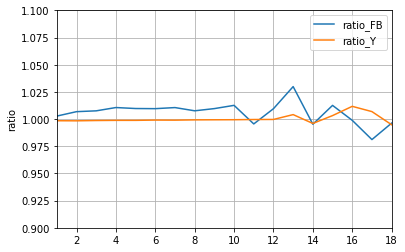

In [346]:
list1 = data['ratio_FB'].tolist()
list2 = data['ratio_Y'].tolist()
ratio = pd.DataFrame({'ratio_FB': list1, 'ratio_Y': list2})
ratio = ratio.drop([0])
ratio.plot()
plt.grid()
plt.ylim(0.9, 1.1)
plt.ylabel('ratio')
plt.legend()
plt.show()

# Question 3

In [347]:
def print_fun1(x, f, accepted):
    if accepted == 1:
        error1.append((data[1:].apply(lambda y: Futures(y['T'], x[0], x[1], x[2], 0.03) ,axis = 1) - data.Futures[1:]).abs().sum()/(data.shape[0]))
    print("at minimum %.4f %.4f %.4f accepted %d" % (x[0],x[1],x[2], int(accepted)))

In [348]:
def Futures(T, S0, sigma, rho, r):
    b = (1 - np.exp(-k * T)) / k
    a = (r - theta + eta**2 / 2.0*k**2 - sigma*eta*rho / k) * T + eta**2*(1 - np.exp(-2.0*k*T)) / 4.0*k**3\
    + (k*theta + sigma*eta*rho - eta**2/k) * (1 - np.exp(-k*T)) / k**2
    return S0 * np.exp(a - b*y0)
fun = lambda x: (data[1:].apply(lambda y: Futures(y['T'], x[0], x[1], x[2], 0.03) ,axis = 1) - data.Futures[1:]).abs().sum()
initial_guess = (1,1,1)
error1 = []
#res = minimize(fun, initial_guess,options={'disp': True})
res1 = basinhopping(fun,initial_guess, callback = print_fun1)
res1.x

at minimum 55.6011 -0.5789 -0.9795 accepted 1
at minimum 55.4970 -1.0350 -0.5540 accepted 1
at minimum 55.6098 -1.1948 -0.4739 accepted 1
at minimum 55.6605 -0.6773 -0.8321 accepted 1
at minimum 55.7036 -0.9591 -0.5892 accepted 1
at minimum 55.6689 -0.8110 -0.6947 accepted 1
at minimum 55.6244 -1.0102 -0.5617 accepted 1
at minimum 55.6082 -0.7861 -0.7198 accepted 1
at minimum 55.6814 -0.7471 -0.7539 accepted 1
at minimum 55.6157 -0.8033 -0.7024 accepted 1
at minimum 55.6672 -0.6155 -0.9171 accepted 1
at minimum 55.5991 -0.6844 -0.8307 accepted 1
at minimum 55.7452 -0.8671 -0.6485 accepted 1
at minimum 55.6343 -1.1429 -0.4941 accepted 1
at minimum 55.5901 -0.9719 -0.5810 accepted 1
at minimum 55.6252 -1.0095 -0.5601 accepted 1
at minimum 55.6338 -0.8415 -0.6707 accepted 1
at minimum 55.8050 -1.2099 -0.4640 accepted 1
at minimum 55.6766 -1.1535 -0.4885 accepted 1
at minimum 55.6771 -1.1210 -0.5026 accepted 1
at minimum 55.5418 -1.1553 -0.4894 accepted 1
at minimum 55.6632 -0.7787 -0.7299

KeyboardInterrupt: 

In [349]:
[S0, sigma, rho] = [54.74407541, -0.546804  ,  0.09507821]
r = 0.03
data['F'] = Futures(data['T'], S0, sigma, rho, r)
data

,Contract,Futures,T,Bt,FB,ratio_FB,Y,ratio_Y,F
SettlementDate,,,,,,,,,
2019-11-20,Dec 2019,56.23,0.103175,1.711965,96.263801,0.000000,1.001457,0.000000,55.530299
2019-12-19,Jan 2020,56.27,0.218254,1.706028,95.998176,1.002767,1.002980,0.998481,55.364198
2020-01-21,Feb 2020,56.10,0.349206,1.699603,95.347729,1.006822,1.004583,0.998404,55.178657
2020-02-20,Mar 2020,55.86,0.468254,1.694063,94.630353,1.007581,1.005920,0.998671,55.013210
2020-03-20,Apr 2020,55.44,0.583333,1.688974,93.636719,1.010612,1.007104,0.998824,54.856216
2020-04-21,May 2020,55.08,0.710317,1.683657,92.735816,1.009715,1.008288,0.998826,54.686358
2020-05-19,Jun 2020,54.70,0.821429,1.679256,91.855293,1.009586,1.009219,0.999078,54.540658
2020-06-22,Jul 2020,54.29,0.956349,1.674221,90.893451,1.010582,1.010218,0.999011,54.367433
2020-07-21,Aug 2020,54.01,1.071429,1.670189,90.206903,1.007611,1.010958,0.999268,54.222910


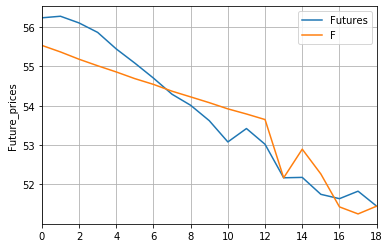

In [350]:
list1 = data['Futures'].tolist()
list2 = data['F'].tolist()
futures = pd.DataFrame({'Futures': list1, 'F': list2})
futures.plot()
plt.grid()
#plt.ylim(0.9, 1.1)
plt.ylabel('Future_prices')
plt.legend()
plt.show()

# Question 4

In [410]:
T  = 3/12 
timestep = 200

Ti = 201
Tj = 201

def Grid(Ti,Tj,T,timestep):
    # input hyperparamters
    bound_up_S  = 111.36
    bound_low_S = 0
    bound_up_y  = 1
    bound_low_y = -1
    
    
    T = T
    timestep = timestep
    
    line_S      = np.linspace(bound_low_S, bound_up_S, Ti)
    line_y      = np.linspace(bound_low_y, bound_up_y, Tj)
    line_t      = np.linspace(0, T, timestep)
    S,t,y = np.meshgrid(line_S,line_t,line_y)
    
    dS = (bound_up_S - bound_low_S) / Ti
    dy = (bound_up_y - bound_low_y) / Tj
    dt = T / timestep
    return S,y,t,dS,dy,dt

[k, theta, eta, y0] = [0.8113, 0.0491, -0.2497, -0.0282]
[S0, sigma, rho] = [54.74407541, -0.546804  ,  0.09507821]
r = 0.03

# ATM European Call

In [411]:
K_atmE = S0
S,y,t,dS,dy,dt = Grid(Ti,Tj,3/12,timestep)
g_atmE = np.maximum(S - K_atmE, 0)
    
a = 1/2 * sigma**2 * S
b = S* (r - y)
c = -r
d = 1/2 * eta**2
e = k * (theta - y)
f = sigma * eta * S * rho

A = (dt * f) / (4.0 * dS * dy)
B = dt * a / dS**2 - (dt * b) / (2.0 * dS)
C = - (dt * f) / (4.0 * dS * dy)
D = dt * d / dy**2 - (dt * e) / (2.0 * dy)
E = 1 - 2.0 * dt * a / dS**2 + dt * c - 2.0 * dt * d / dy**2
F = dt * d / dy**2 + (dt * e) / (2.0 * dy)
G = - (dt * f) / (4.0 * dS * dy)
H = dt * a / dS**2 + (dt * b) / (2.0 * dS)
I = (dt * f) / (4.0 * dS * dy)
for m in range(timestep-1,-1,-1): 
    g_atmE[m,:,Tj-1] = np.maximum(S[m,:,Tj-1] * np.exp(-1*dt*(timestep-1-m)) - K_atmE * np.exp(-r*(timestep-1-m)),0)
    g_atmE[m,:,0]    = np.maximum(S[m,:,Tj-1] - K_atmE * np.exp(-r*(timestep-1-m)),0)
    for i,j in zip(range(1,Ti-1), range(1,Tj-1)): 
        g_atmE[m-1, i, j] = A[m, i, j] * g_atmE[m, i-1, j-1] + B[m, i, j] * g_atmE[m, i-1, j] + C[m, i, j] * g_atmE[m, i-1, j+1]\
        + D[m, i, j] * g_atmE[m, i, j-1] + E[m, i, j] * g_atmE[m, i, j] + F[m, i, j] * g_atmE[m, i, j+1]\
        + G[m, i, j] * g_atmE[m, i+1, j-1] + H[m, i, j] * g_atmE[m, i+1, j] + I[m, i, j] * g_atmE[m, i+1, j+1]

In [412]:
g_atmE[0, 100, 100]

0.938931648100951

In [413]:
theta_atmE = (g_atmE[0, 100, 100] - g_atmE[1, 100, 100]) / dt
delta_atmE_S = (g_atmE[1, 101, 100] - g_atmE[1, 99, 100]) / (2.0 * dS)
gamma_atmE_S = (g_atmE[1, 101, 100] - 2.0 * g_atmE[1, 100, 100] + g_atmE[1, 99, 100]) / dS**2
delta_atmE_y = (g_atmE[1, 100, 101] - g_atmE[1, 100, 99]) / (2.0 * dy)
gamma_atmE_y = (g_atmE[1, 100, 101] - 2.0 * g_atmE[1, 100, 100] + g_atmE[1, 100, 99]) / dy**2

In [414]:
theta_atmE, delta_atmE_S, gamma_atmE_S, delta_atmE_y, gamma_atmE_y

(0.0, 1.0049999999999983, -0.019593205132685233, 0.0, -60.7440771684228)

# 10% ITM European Call

In [415]:
K_itmE = S0 * 0.9
S,y,t,dS,dy,dt = Grid(Ti,Tj,3/12,timestep)
g_itmE = np.maximum(S - K_itmE, 0)

a = 1/2 * sigma**2 * S
b = S* (r - y)
c = -r
d = 1/2 * eta**2
e = k * (theta - y)
f = sigma * eta * S * rho

A = (dt * f) / (4.0 * dS * dy)
B = dt * a / dS**2 - (dt * b) / (2.0 * dS)
C = - (dt * f) / (4.0 * dS * dy)
D = dt * d / dy**2 - (dt * e) / (2.0 * dy)
E = 1 - 2.0 * dt * a / dS**2 + dt * c - 2.0 * dt * d / dy**2
F = dt * d / dy**2 + (dt * e) / (2.0 * dy)
G = - (dt * f) / (4.0 * dS * dy)
H = dt * a / dS**2 + (dt * b) / (2.0 * dS)
I = (dt * f) / (4.0 * dS * dy)
for m in range(timestep-1,-1,-1): 
    g_itmE[m,:,Tj-1] = np.maximum(S[m,:,Tj-1] * np.exp(-1*dt*(timestep-1-m)) - K_itmE * np.exp(-r*(timestep-1-m)),0)
    g_itmE[m,:,0]    = np.maximum(S[m,:,Tj-1] - K_itmE * np.exp(-r*(timestep-1-m)),0)
    for i,j in zip(range(1,Ti-1), range(1,Tj-1)): 
        g_itmE[m-1, i, j] = A[m, i, j] * g_itmE[m, i-1, j-1] + B[m, i, j] * g_itmE[m, i-1, j] + C[m, i, j] * g_itmE[m, i-1, j+1]\
        + D[m, i, j] * g_itmE[m, i, j-1] + E[m, i, j] * g_itmE[m, i, j] + F[m, i, j] * g_itmE[m, i, j+1]\
        + G[m, i, j] * g_itmE[m, i+1, j-1] + H[m, i, j] * g_itmE[m, i+1, j] + I[m, i, j] * g_itmE[m, i+1, j+1]

In [416]:
g_itmE[0, 100, 100]

6.412734613624319

In [417]:
theta_itmE = (g_itmE[0, 100, 100] - g_itmE[1, 100, 100]) / dt
delta_itmE_S = (g_itmE[1, 101, 100] - g_itmE[1, 99, 100]) / (2.0 * dS)
gamma_itmE_S = (g_atmE[1, 101, 100] - 2.0 * g_itmE[1, 100, 100] + g_itmE[1, 99, 100]) / dS**2
delta_itmE_y = (g_itmE[1, 100, 101] - g_itmE[1, 100, 99]) / (2.0 * dy)
gamma_itmE_y = (g_itmE[1, 100, 101] - 2.0 * g_itmE[1, 100, 100] + g_itmE[1, 100, 99]) / dy**2

In [418]:
theta_itmE, delta_itmE_S, gamma_itmE_S, delta_itmE_y, gamma_itmE_y

(0.0, 1.0049999999999983, -17.850558751490816, 0.0, -48.53135025275718)

# 10% OTM European Call

In [419]:
K_otmE = S0 * 1.1
S,y,t,dS,dy,dt = Grid(Ti,Tj,3/12,timestep)
g_otmE = np.maximum(S - K_otmE, 0)

a = 1/2 * sigma**2 * S
b = S* (r - y)
c = -r
d = 1/2 * eta**2
e = k * (theta - y)
f = sigma * eta * S * rho

A = (dt * f) / (4.0 * dS * dy)
B = dt * a / dS**2 - (dt * b) / (2.0 * dS)
C = - (dt * f) / (4.0 * dS * dy)
D = dt * d / dy**2 - (dt * e) / (2.0 * dy)
E = 1 - 2.0 * dt * a / dS**2 + dt * c - 2.0 * dt * d / dy**2
F = dt * d / dy**2 + (dt * e) / (2.0 * dy)
G = - (dt * f) / (4.0 * dS * dy)
H = dt * a / dS**2 + (dt * b) / (2.0 * dS)
I = (dt * f) / (4.0 * dS * dy)
for m in range(timestep-1,-1,-1): 
    g_otmE[m,:,Tj-1] = np.maximum(S[m,:,Tj-1] * np.exp(-1*dt*(timestep-1-m)) - K_otmE * np.exp(-r*(timestep-1-m)),0)
    g_otmE[m,:,0]    = np.maximum(S[m,:,Tj-1] - K_otmE * np.exp(-r*(timestep-1-m)),0)
    for i,j in zip(range(1,Ti-1), range(1,Tj-1)): 
        g_otmE[m-1, i, j] = A[m, i, j] * g_otmE[m, i-1, j-1] + B[m, i, j] * g_otmE[m, i-1, j] + C[m, i, j] * g_otmE[m, i-1, j+1]\
        + D[m, i, j] * g_otmE[m, i, j-1] + E[m, i, j] * g_otmE[m, i, j] + F[m, i, j] * g_otmE[m, i, j+1]\
        + G[m, i, j] * g_otmE[m, i+1, j-1] + H[m, i, j] * g_otmE[m, i+1, j] + I[m, i, j] * g_otmE[m, i+1, j+1]

In [420]:
g_otmE[0, 100, 100]

6.657245079001103e-13

In [421]:
theta_otmE = (g_otmE[0, 100, 100] - g_otmE[1, 100, 100]) / dt
delta_otmE_S = (g_otmE[1, 101, 100] - g_otmE[1, 99, 100]) / (2.0 * dS)
gamma_otmE_S = (g_otmE[1, 101, 100] - 2.0 * g_otmE[1, 100, 100] + g_otmE[1, 99, 100]) / dS**2
delta_otmE_y = (g_otmE[1, 100, 101] - g_otmE[1, 100, 99]) / (2.0 * dy)
gamma_otmE_y = (g_otmE[1, 100, 101] - 2.0 * g_otmE[1, 100, 100] + g_otmE[1, 100, 99]) / dy**2

In [422]:
theta_otmE, delta_otmE_S, gamma_otmE_S, delta_otmE_y, gamma_otmE_y

(0.0, 0.0, -4.3376870041181604e-12, 0.0, -1.3447967921836179e-08)

# ATM American Call

In [423]:
K_atmA = S0
S,y,t,dS,dy,dt = Grid(Ti,Tj,3/12,timestep)
g_atmA = np.maximum(S - K_atmA, 0)

a = 1/2 * sigma**2 * S
b = S* (r - y)
c = -r
d = 1/2 * eta**2
e = k * (theta - y)
f = sigma * eta * S * rho

A = (dt * f) / (4.0 * dS * dy)
B = dt * a / dS**2 - (dt * b) / (2.0 * dS)
C = - (dt * f) / (4.0 * dS * dy)
D = dt * d / dy**2 - (dt * e) / (2.0 * dy)
E = 1 - 2.0 * dt * a / dS**2 + dt * c - 2.0 * dt * d / dy**2
F = dt * d / dy**2 + (dt * e) / (2.0 * dy)
G = - (dt * f) / (4.0 * dS * dy)
H = dt * a / dS**2 + (dt * b) / (2.0 * dS)
I = (dt * f) / (4.0 * dS * dy)
for m in range(timestep-1,-1,-1): 
    g_atmA[m,:,Tj-1] = np.maximum(S[m,:,Tj-1] * np.exp(-1*dt*(timestep-1-m)) - K_atmA * np.exp(-r*(timestep-1-m)),0)
    g_atmA[m,:,0]    = np.maximum(S[m,:,Tj-1] - K_atmA * np.exp(-r*(timestep-1-m)),0)
    for i,j in zip(range(1,Ti-1), range(1,Tj-1)): 
        g_atmA[m-1, i, j] = np.maximum(A[m, i, j] * g_atmA[m, i-1, j-1] + B[m, i, j] * g_atmA[m, i-1, j] + C[m, i, j] * g_atmA[m, i-1, j+1]\
        + D[m, i, j] * g_atmA[m, i, j-1] + E[m, i, j] * g_atmA[m, i, j] + F[m, i, j] * g_atmA[m, i, j+1]\
        + G[m, i, j] * g_atmA[m, i+1, j-1] + H[m, i, j] * g_atmA[m, i+1, j] + I[m, i, j] * g_atmA[m, i+1, j+1], S[m-1, i, j] - K_atmA)

In [424]:
g_atmA[0, 100, 100]

0.9389316626192353

In [425]:
theta_atmA = (g_atmA[0, 100, 100] - g_atmA[1, 100, 100]) / dt
delta_atmA_S = (g_atmA[1, 101, 100] - g_atmA[1, 99, 100]) / (2.0 * dS)
gamma_atmA_S = (g_atmA[1, 101, 100] - 2.0 * g_atmA[1, 100, 100] + g_atmA[1, 99, 100]) / dS**2
delta_atmA_y = (g_atmA[1, 100, 101] - g_atmA[1, 100, 99]) / (2.0 * dy)
gamma_atmA_y = (g_atmA[1, 100, 101] - 2.0 * g_atmA[1, 100, 100] + g_atmA[1, 100, 99]) / dy**2

In [426]:
theta_atmA, delta_atmA_S, gamma_atmA_S, delta_atmA_y, gamma_atmA_y

(0.0, 1.0049999999999983, -0.01959329973003385, 0.0, -60.744370445025865)

# 10% ITM American Call

In [427]:
K_itmA = S0 * 0.9
S,y,t,dS,dy,dt = Grid(Ti,Tj,3/12,timestep)
g_itmA = np.maximum(S - K_itmA, 0)

a = 1/2 * sigma**2 * S
b = S* (r - y)
c = -r
d = 1/2 * eta**2
e = k * (theta - y)
f = sigma * eta * S * rho

A = (dt * f) / (4.0 * dS * dy)
B = dt * a / dS**2 - (dt * b) / (2.0 * dS)
C = - (dt * f) / (4.0 * dS * dy)
D = dt * d / dy**2 - (dt * e) / (2.0 * dy)
E = 1 - 2.0 * dt * a / dS**2 + dt * c - 2.0 * dt * d / dy**2
F = dt * d / dy**2 + (dt * e) / (2.0 * dy)
G = - (dt * f) / (4.0 * dS * dy)
H = dt * a / dS**2 + (dt * b) / (2.0 * dS)
I = (dt * f) / (4.0 * dS * dy)
for m in range(timestep-1,-1,-1): 
    g_itmA[m,:,Tj-1] = np.maximum(S[m,:,Tj-1] * np.exp(-1*dt*(timestep-1-m)) - K_itmA * np.exp(-r*(timestep-1-m)),0)
    g_itmA[m,:,0]    = np.maximum(S[m,:,Tj-1] - K_itmA * np.exp(-r*(timestep-1-m)),0)
    for i,j in zip(range(1,Ti-1), range(1,Tj-1)): 
        g_itmA[m-1, i, j] = np.maximum(A[m, i, j] * g_itmA[m, i-1, j-1] + B[m, i, j] * g_itmA[m, i-1, j] + C[m, i, j] * g_itmA[m, i-1, j+1]\
        + D[m, i, j] * g_itmA[m, i, j-1] + E[m, i, j] * g_itmA[m, i, j] + F[m, i, j] * g_itmA[m, i, j+1]\
        + G[m, i, j] * g_itmA[m, i+1, j-1] + H[m, i, j] * g_itmA[m, i+1, j] + I[m, i, j] * g_itmA[m, i+1, j+1], S[m-1, i, j] - K_itmA)

In [428]:
g_itmA[0, 100, 100]

6.41273465841009

In [429]:
theta_itmA = (g_itmA[0, 100, 100] - g_itmA[1, 100, 100]) / dt
delta_itmA_S = (g_itmA[1, 101, 100] - g_itmA[1, 99, 100]) / (2.0 * dS)
gamma_itmA_S = (g_atmA[1, 101, 100] - 2.0 * g_itmA[1, 100, 100] + g_itmA[1, 99, 100]) / dS**2
delta_itmA_y = (g_itmA[1, 100, 101] - g_itmA[1, 100, 99]) / (2.0 * dy)
gamma_itmA_y = (g_itmA[1, 100, 101] - 2.0 * g_itmA[1, 100, 100] + g_itmA[1, 100, 99]) / dy**2

In [430]:
theta_itmA, delta_itmA_S, gamma_itmA_S, delta_itmA_y, gamma_itmA_y

(0.0, 1.0049999999999983, -17.850559043303203, 0.0, -48.53225494773508)

# 10% OTM American Call

In [431]:
K_otmA = S0 * 1.1
S,y,t,dS,dy,dt = Grid(Ti,Tj,3/12,timestep)
g_otmA = np.maximum(S - K_otmA, 0)

a = 1/2 * sigma**2 * S
b = S* (r - y)
c = -r
d = 1/2 * eta**2
e = k * (theta - y)
f = sigma * eta * S * rho

A = (dt * f) / (4.0 * dS * dy)
B = dt * a / dS**2 - (dt * b) / (2.0 * dS)
C = - (dt * f) / (4.0 * dS * dy)
D = dt * d / dy**2 - (dt * e) / (2.0 * dy)
E = 1 - 2.0 * dt * a / dS**2 + dt * c - 2.0 * dt * d / dy**2
F = dt * d / dy**2 + (dt * e) / (2.0 * dy)
G = - (dt * f) / (4.0 * dS * dy)
H = dt * a / dS**2 + (dt * b) / (2.0 * dS)
I = (dt * f) / (4.0 * dS * dy)
    
for m in range(timestep-1,-1,-1): 
    g_otmA[m,:,Tj-1] = np.maximum(S[m,:,Tj-1] * np.exp(-1*dt*(timestep-1-m)) - K_otmA * np.exp(-r*(timestep-1-m)),0)
    g_otmA[m,:,0]    = np.maximum(S[m,:,Tj-1] - K_otmA * np.exp(-r*(timestep-1-m)),0)
    for i,j in zip(range(1,Ti-1), range(1,Tj-1)): 
        g_otmA[m-1, i, j] = np.maximum(A[m, i, j] * g_otmA[m, i-1, j-1] + B[m, i, j] * g_otmA[m, i-1, j] + C[m, i, j] * g_otmA[m, i-1, j+1]\
        + D[m, i, j] * g_otmA[m, i, j-1] + E[m, i, j] * g_otmA[m, i, j] + F[m, i, j] * g_otmA[m, i, j+1]\
        + G[m, i, j] * g_otmA[m, i+1, j-1] + H[m, i, j] * g_otmA[m, i+1, j] + I[m, i, j] * g_otmA[m, i+1, j+1], S[m-1, i, j] - K_otmA)

In [432]:
g_otmA[0, 100, 100]

6.670919701938952e-13

In [433]:
theta_otmA = (g_otmA[0, 100, 100] - g_otmA[1, 100, 100]) / dt
delta_otmA_S = (g_otmA[1, 101, 100] - g_otmA[1, 99, 100]) / (2.0 * dS)
gamma_otmA_S = (g_otmA[1, 101, 100] - 2.0 * g_otmA[1, 100, 100] + g_otmA[1, 99, 100]) / dS**2
delta_otmA_y = (g_otmA[1, 100, 101] - g_otmA[1, 100, 99]) / (2.0 * dy)
gamma_otmA_y = (g_otmA[1, 100, 101] - 2.0 * g_otmA[1, 100, 100] + g_otmA[1, 100, 99]) / dy**2

In [434]:
theta_otmA, delta_otmA_S, gamma_otmA_S, delta_otmA_y, gamma_otmA_y

(0.0, 0.0, -4.346597031238963e-12, 0.0, -1.347559134390178e-08)